In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [2]:
# Calculates G(r) / n
def G_norm(kF_r):
    if type(kF_r) is float or type(kF_r) is int:
        if kF_r == 0:
            return 0.5
        else:
            return 3/2 * (np.sin(kF_r) - kF_r * np.cos(kF_r)) / kF_r**3
    else:
        is_zero_arr = kF_r == 0
        return np.array([0.5 if is_zero else 3/2 * (np.sin(x) - x * np.cos(x)) / x**3 for is_zero, x in zip(is_zero_arr, kF_r)])

def G_norm_bound(kF_r):
    return 3/2 * np.hypot(1 / kF_r**3, 1 / kF_r**2)

# Calculates <n(r)n(0)> / n^2
def density_norm(kF_r):
    return 4 * G_norm(0)**2 - 2 * G_norm(kF_r)**2

# Calculates <S(r)S(0)> / n^2
def spin_norm(kF_r):
    return 3/4 * (-2) * G_norm(kF_r)**2

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in multiply


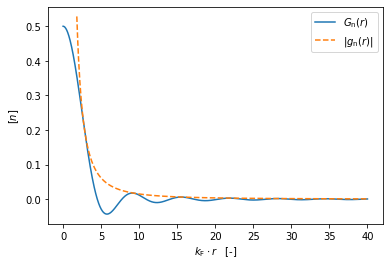

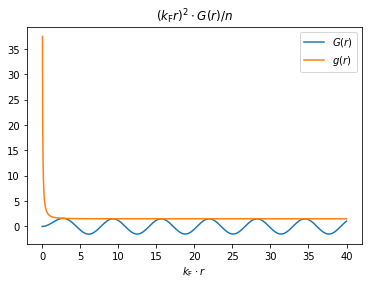

In [41]:
xs = np.linspace(0, 40, 1000)
Gs = G_norm(xs)
Gs_bound = G_norm_bound(xs)

plt.figure(1)
plt.plot(xs, Gs, label=r'$G_\mathrm{n}(r)$')
i = 45
plt.plot(xs[i:], Gs_bound[i:], '--', label=r'$|g_\mathrm{n}(r)|$')
plt.xlabel('$k_\mathrm{F} \cdot r$   [-]')
plt.ylabel('[$n$]')
# plt.title('$G(r) / n$')
plt.legend()

plt.savefig("../latex/G_normal.pdf", format="pdf", bbox_inches="tight")

plt.figure(2)
plt.plot(xs, Gs * xs**2, label='$G(r)$')
plt.plot(xs, Gs_bound * xs**2, label='$g(r)$')
plt.xlabel(r'$k_\mathrm{F} \cdot r$')
plt.title(r'$(k_\mathrm{F} r)^2 \cdot G(r) / n$')
plt.legend()

plt.show()

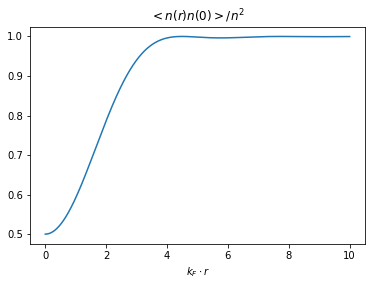

In [4]:
xs = np.linspace(0, 10, 1000)
density = density_norm(xs)
plt.plot(xs, density)
plt.xlabel('$k_F \cdot r$')
plt.title('$<n(r)n(0)> / n^2$')
plt.show()

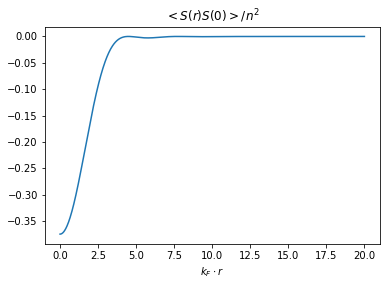

In [5]:
xs = np.linspace(0, 20, 1000)
spin = spin_norm(xs)
plt.plot(xs, spin)
plt.xlabel('$k_F \cdot r$')
plt.title('$<S(r)S(0)> / n^2$')
plt.show()